## Comparison of different kernels for LSTM-CNN
The purpose is to investigate which kernels (filter sizes) to pick for the final model (LSTM + Inception).

The following data are from training exercises of the following LSTM-CNN Model:

1. word embeddings (pretrained GloVe, frozen values)
2. bidirectional layer of 4 LSTM units
3. single convolutional layer, 24 filters (kernel varied)
4. fully connected layer (16 hidden units)
5. 4 class softmax output

Optimiser used is [AdaDelta](https://arxiv.org/abs/1212.5701). L2 regularisation and dropout were used to reduce over fitting. Every training run uses batch-size of 64 and runs for 50 epoch.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
%config InlineBackend.figure_format = 'retina'
epoch, acc_3, loss_3, val_acc_3, val_loss_3 = [],[],[],[],[]
acc_5, loss_5, val_acc_5, val_loss_5 = [],[],[],[]
acc_7, loss_7, val_acc_7, val_loss_7 = [],[],[],[]
acc_6, loss_6, val_acc_6, val_loss_6 = [],[],[],[]
acc_4, loss_4, val_acc_4, val_loss_4 = [],[],[],[]
acc_8, loss_8, val_acc_8, val_loss_8 = [],[],[],[]
acc_2, loss_2, val_acc_2, val_loss_2 = [],[],[],[]
with open('history-3.csv', newline='') as f:
    reader = csv.reader(f)
    for i,row in enumerate(reader):
        if i > 0:
            epoch.append(float(row[0])) # standardise 50 epoch
            acc_3.append(float(row[1]))
            loss_3.append(float(row[2]))
            val_acc_3.append(float(row[4]))
            val_loss_3.append(float(row[5]))
with open('history-5.csv', newline='') as f:
    reader = csv.reader(f)
    for i,row in enumerate(reader):
        if i > 0:
            acc_5.append(float(row[1]))
            loss_5.append(float(row[2]))
            val_acc_5.append(float(row[3]))
            val_loss_5.append(float(row[4]))
with open('history-7.csv', newline='') as f:
    reader = csv.reader(f)
    for i,row in enumerate(reader):
        if i > 0:
            acc_7.append(float(row[1]))
            loss_7.append(float(row[2]))
            val_acc_7.append(float(row[3]))
            val_loss_7.append(float(row[4]))
with open('history-6.csv', newline='') as f:
    reader = csv.reader(f)
    for i,row in enumerate(reader):
        if i > 0:
            acc_6.append(float(row[1]))
            loss_6.append(float(row[2]))
            val_acc_6.append(float(row[3]))
            val_loss_6.append(float(row[4]))
with open('history-4.csv', newline='') as f:
    reader = csv.reader(f)
    for i,row in enumerate(reader):
        if i > 0:
            acc_4.append(float(row[1]))
            loss_4.append(float(row[2]))
            val_acc_4.append(float(row[3]))
            val_loss_4.append(float(row[4]))
with open('history-8.csv', newline='') as f:
    reader = csv.reader(f)
    for i,row in enumerate(reader):
        if i > 0:
            acc_8.append(float(row[1]))
            loss_8.append(float(row[2]))
            val_acc_8.append(float(row[3]))
            val_loss_8.append(float(row[4]))
with open('history-2.csv', newline='') as f:
    reader = csv.reader(f)
    for i,row in enumerate(reader):
        if i > 0:
            acc_2.append(float(row[1]))
            loss_2.append(float(row[2]))
            val_acc_2.append(float(row[3]))
            val_loss_2.append(float(row[4]))

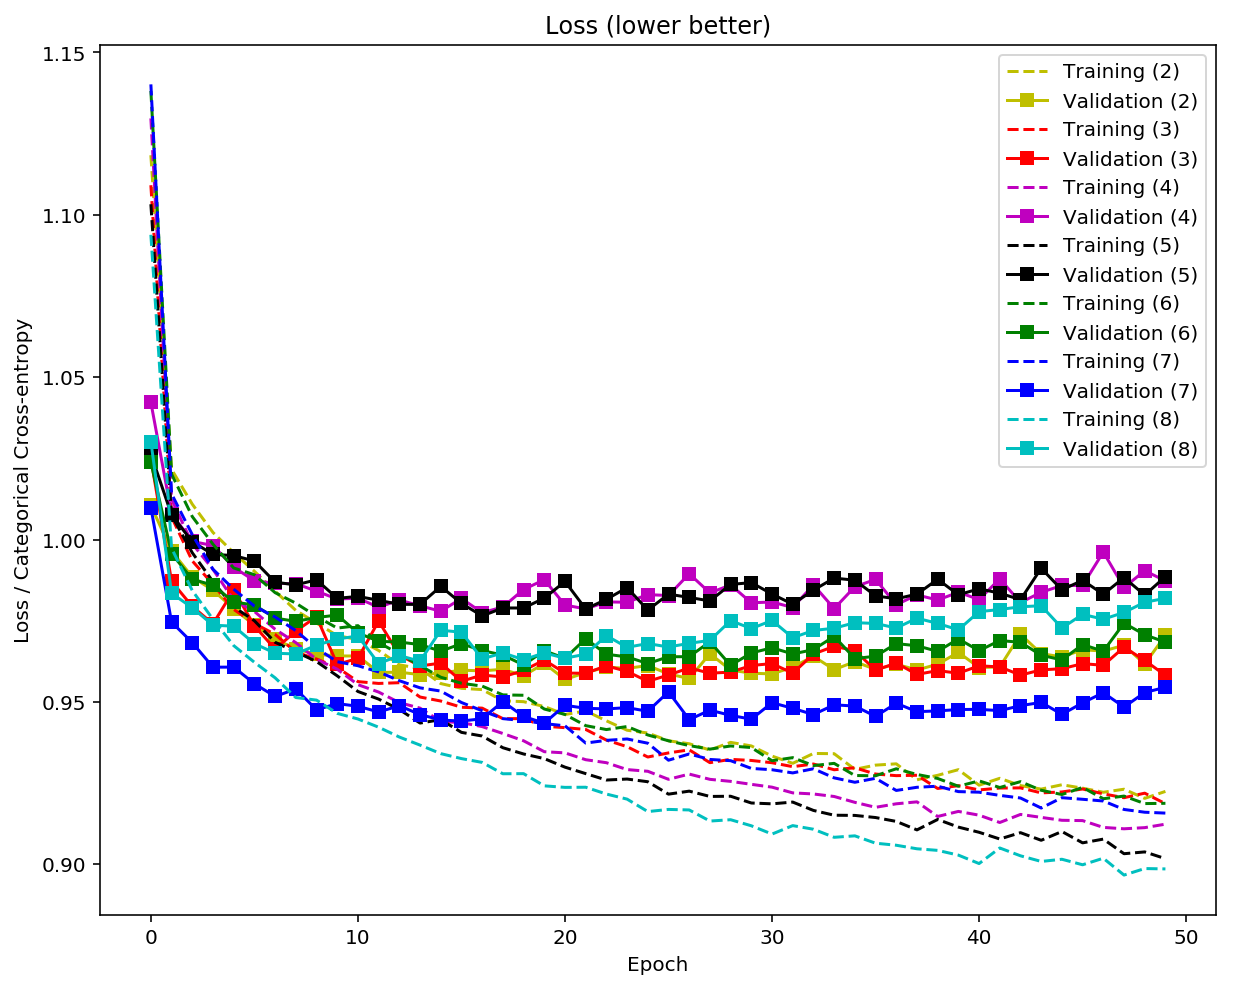

In [2]:
plt.figure(1, figsize=(10, 8))
plt.xlabel('Epoch')
plt.ylabel('Loss / Categorical Cross-entropy')
plt.title('Loss (lower better)')
plt.plot(epoch, loss_2, 'y--',label="Training (2)")
plt.plot(epoch, val_loss_2, 'ys-',label="Validation (2)")
plt.plot(epoch, loss_3, 'r--',label="Training (3)")
plt.plot(epoch, val_loss_3, 'rs-',label="Validation (3)")
plt.plot(epoch, loss_4, 'm--',label="Training (4)")
plt.plot(epoch, val_loss_4, 'ms-',label="Validation (4)")
plt.plot(epoch, loss_5, 'k--',label="Training (5)")
plt.plot(epoch, val_loss_5, 'ks-',label="Validation (5)")
plt.plot(epoch, loss_6, 'g--',label="Training (6)")
plt.plot(epoch, val_loss_6, 'gs-',label="Validation (6)")
plt.plot(epoch, loss_7, 'b--',label="Training (7)")
plt.plot(epoch, val_loss_7, 'bs-',label="Validation (7)")
plt.plot(epoch, loss_8, 'c--',label="Training (8)")
plt.plot(epoch, val_loss_8, 'cs-',label="Validation (8)")
plt.legend(loc=0)
plt.show()

- Lowest validation loss: **kernel 7**
- However, kernel 7 starts to over fit mildly (probably significant after 50 epoch) before kernel 3 does.
- Kernel 5 is prone to over fitting. It has lower training loss than 3, but higher validation loss.
- Kernel 4 performs very similarly to 5.

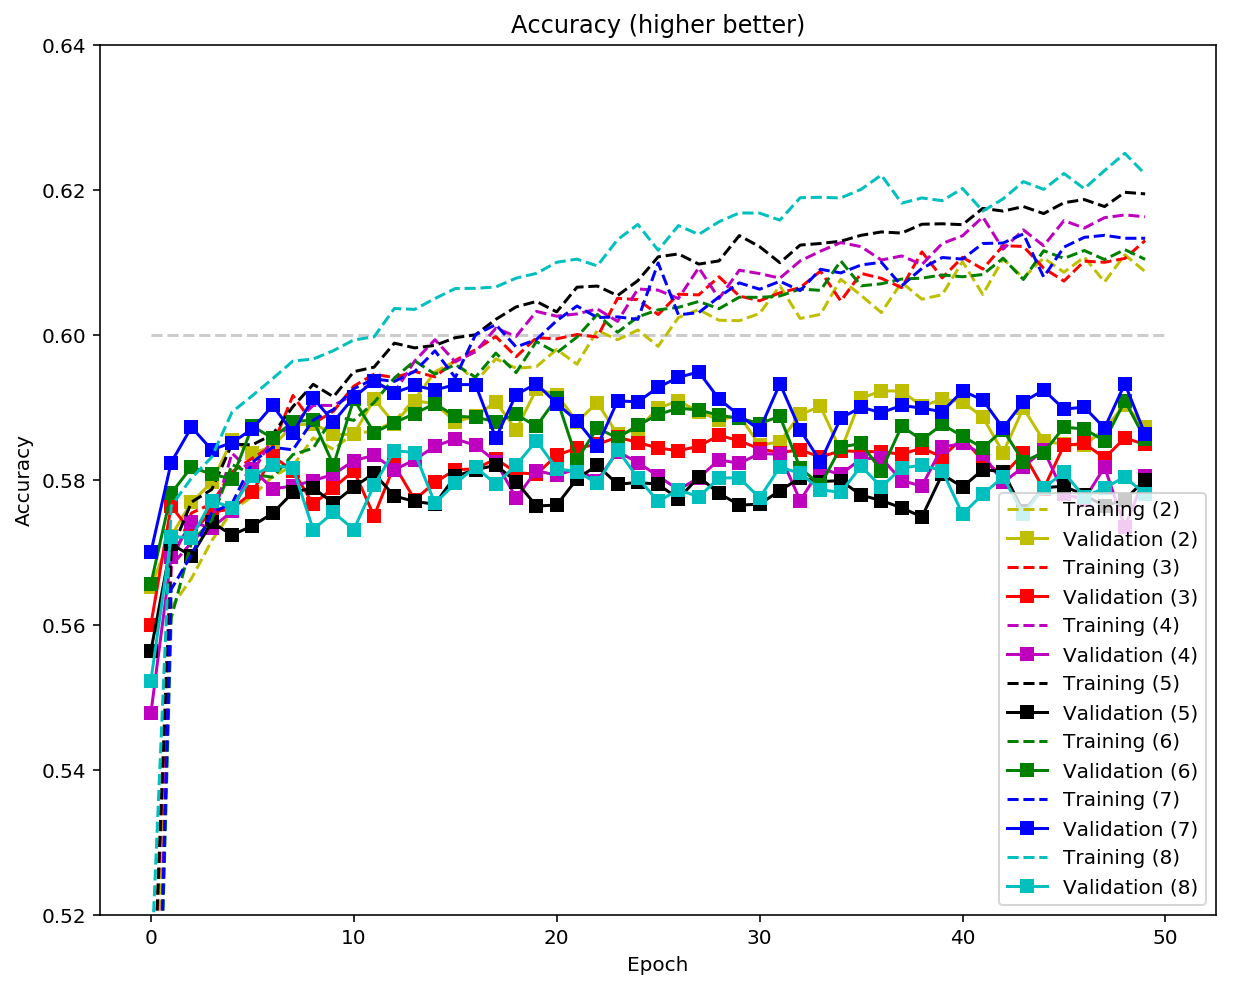

In [3]:
plt.figure(1, figsize=(10, 8))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim( 0.52, 0.64 )
plt.title('Accuracy (higher better)')
plt.plot(epoch, acc_2, 'y--',label="Training (2)")
plt.plot(epoch, val_acc_2, 'ys-',label="Validation (2)")
plt.plot(epoch, acc_3, 'r--',label="Training (3)")
plt.plot(epoch, val_acc_3, 'rs-',label="Validation (3)")
plt.plot(epoch, acc_4, 'm--',label="Training (4)")
plt.plot(epoch, val_acc_4, 'ms-',label="Validation (4)")
plt.plot(epoch, acc_5, 'k--',label="Training (5)")
plt.plot(epoch, val_acc_5, 'ks-',label="Validation (5)")
plt.plot(epoch, acc_6, 'g--',label="Training (6)")
plt.plot(epoch, val_acc_6, 'gs-',label="Validation (6)")
plt.plot(epoch, acc_7, 'b--',label="Training (7)")
plt.plot(epoch, val_acc_7, 'bs-',label="Validation (7)")
plt.plot(epoch, acc_8, 'c--',label="Training (8)")
plt.plot(epoch, val_acc_8, 'cs-',label="Validation (8)")
plt.hlines(0.6, 0, 50,linestyle = "--" , alpha = 0.2)
plt.legend(loc=4)
plt.show()

- **Kernel 7** has the highest validation accuracy. Kernel 6 follows very closely behind.
- In order of validation accuracy: 7 > 2 > 6 > 3 > 5/4/8.
- Slight advantage of kernel 3 over 5 in validation accuracy. It currently shows no sign of over fitting!
- Kernel 5 is prone to over fitting. It has higher training acc than 3 or 7, but lower validation acc.
- Performance of 4 and 5 are very similar, with very slight advantage to kernel 4.
- Kernel 8 over fits the most.

## Conclusion
What combination shall we use?

- Low number of kernel 5 and/or 4, with regularisation and dropout.
- Moderate number of kernel 3
- Moderate number of kernel 7, with regularisation. Although it seems to be most effective, it also presents the significant possibility of over fitting.

**Our overall aim is to exceed 60% validation accuracy.**